# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Importing the dataset

In [2]:
df = pd.read_csv("./stroke_risk_dataset.csv")

df = df.drop(columns=["Stroke Risk (%)"])

# Cleaning the dataset

## 1. Dropping uncessary columns

In [3]:
# df = df.drop(columns=["Unnamed: 0"])
# df

## 2. Finding Null values

In [4]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [5]:
# probs = df['Alcohol_Consumption'].value_counts(normalize=True)
# null_mask = df['Alcohol_Consumption'].isna()
# df.loc[null_mask, 'Alcohol_Consumption'] = np.random.choice(probs.index, size=null_mask.sum(), p=probs.values)

In [6]:
# df['Alcohol_Consumption'].value_counts()

df = df.dropna()

Replaced null values according to their probabilities to avoid bias

# Finding categorial and numerical columns

In [7]:
categorical_column_names = []
numerical_column_names = []
target_column_name = "At Risk (Binary)"
for column_name, data_type in df.dtypes.items():
    # check if the datatype is categorial or not
    if isinstance(data_type, np.dtypes.ObjectDType) and column_name is not target_column_name:
        categorical_column_names.append(column_name)
    else:
        if column_name != target_column_name:
            numerical_column_names.append(column_name)

categorical_column_names, numerical_column_names

([],
 ['Chest Pain',
  'Shortness of Breath',
  'Irregular Heartbeat',
  'Fatigue & Weakness',
  'Dizziness',
  'Swelling (Edema)',
  'Pain in Neck/Jaw/Shoulder/Back',
  'Excessive Sweating',
  'Persistent Cough',
  'Nausea/Vomiting',
  'High Blood Pressure',
  'Chest Discomfort (Activity)',
  'Cold Hands/Feet',
  'Snoring/Sleep Apnea',
  'Anxiety/Feeling of Doom',
  'Age'])

# Exploratory Data Analysis (EDA)

In [8]:
# # Sample DataFrame

# # Count 0s and 1s
# counts = df['Previous_Gestational_Diabetes'].value_counts().sort_index()  # Optional: sort_index() puts 0 before 1

# # --- Bar Chart ---
# plt.figure(figsize=(6,4))
# plt.bar(counts.index.astype(str), counts.values)
# plt.title("Count of 0s and 1s in 'status' column")
# plt.xlabel("Diabetes")
# plt.ylabel("Count")
# plt.show()

# # --- Pie Chart (optional) ---
# plt.figure(figsize=(6,6))
# plt.pie(counts.values, labels=['0', '1'], autopct='%1.1f%%', startangle=90)
# plt.title("Distribution of 0s and 1s in 'Diabetes'")
# plt.axis('equal')
# plt.show()

Dataset is balanced to avoid model bias towards a single class

# Data Preprocessing

## Splitting the dataset into independend features and target

In [9]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

## Train test split

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# smote = SMOTE(random_state = 14)

# X_train, y_train = smote.fit_resample(X_train, y_train)


In [11]:
# Define columns
categorical_cols = categorical_column_names
numerical_cols = numerical_column_names

# Create transformers

if len(categorical_column_names) == 0:  
    preprocessor = ColumnTransformer([
        # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
else:
    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
# Fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [12]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.997788,-0.992315,-0.996079,-0.999643,0.993663,-1.003184,-1.001966,0.992138,-1.003900,1.001537,-1.002611,-0.998465,1.001322,-0.99925,-1.001608,-1.613315
1,-1.002217,1.007744,-0.996079,-0.999643,-1.006377,0.996826,-1.001966,0.992138,-1.003900,1.001537,-1.002611,-0.998465,-0.998679,1.00075,0.998394,-1.234034
2,-1.002217,1.007744,1.003936,-0.999643,-1.006377,0.996826,0.998038,0.992138,-1.003900,-0.998465,0.997396,-0.998465,-0.998679,-0.99925,0.998394,1.515755
3,-1.002217,-0.992315,1.003936,-0.999643,-1.006377,0.996826,0.998038,-1.007924,-1.003900,1.001537,0.997396,-0.998465,1.001322,1.00075,-1.001608,1.183884
4,0.997788,1.007744,-0.996079,1.000357,-1.006377,0.996826,0.998038,-1.007924,0.996115,-0.998465,-1.002611,1.001537,1.001322,-0.99925,-1.001608,0.425321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-1.002217,-0.992315,-0.996079,-0.999643,0.993663,0.996826,-1.001966,0.992138,0.996115,-0.998465,-1.002611,-0.998465,-0.998679,-0.99925,-1.001608,0.709782
55996,0.997788,1.007744,-0.996079,-0.999643,0.993663,0.996826,0.998038,0.992138,-1.003900,1.001537,-1.002611,1.001537,-0.998679,1.00075,-1.001608,-1.186623
55997,0.997788,-0.992315,-0.996079,1.000357,0.993663,0.996826,-1.001966,-1.007924,0.996115,-0.998465,0.997396,1.001537,-0.998679,1.00075,-1.001608,-1.423674
55998,0.997788,-0.992315,-0.996079,1.000357,0.993663,0.996826,0.998038,0.992138,0.996115,1.001537,0.997396,1.001537,1.001322,-0.99925,0.998394,1.610575


# Training our model

In [13]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=28)
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

# Evaluation
print("📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

📊 Decision Tree Results
Accuracy: 0.8855
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4892
           1       0.91      0.91      0.91      9108

    accuracy                           0.89     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.89      0.89      0.89     14000



📊 Logistic Regression Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



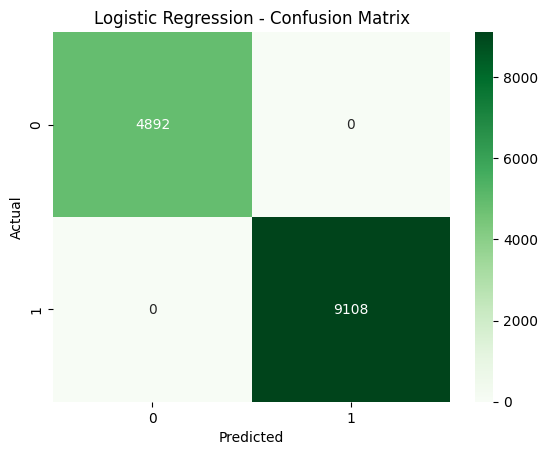

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
lr_model = LogisticRegression(max_iter=10000)  # increase max_iter if convergence warnings
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Neural Network (MLP) Results
Accuracy: 0.9960714285714286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



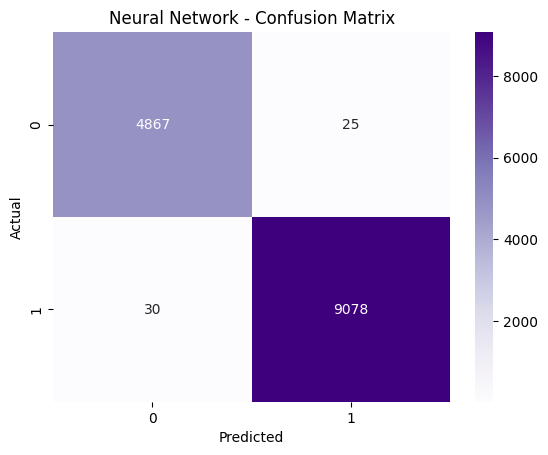

In [15]:
from sklearn.neural_network import MLPClassifier

# Create and train the model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Predict
nn_preds = nn_model.predict(X_test)

# Evaluate
print("📊 Neural Network (MLP) Results")
print("Accuracy:", accuracy_score(y_test, nn_preds))
print(classification_report(y_test, nn_preds))

# Confusion matrix
cm_nn = confusion_matrix(y_test, nn_preds)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


d:\disha-ml-project\disha-ml-project-venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:54:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Classifier Results
Accuracy: 0.5494285714285714
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      4892
           1       1.00      0.31      0.47      9108

    accuracy                           0.55     14000
   macro avg       0.72      0.65      0.54     14000
weighted avg       0.80      0.55      0.52     14000



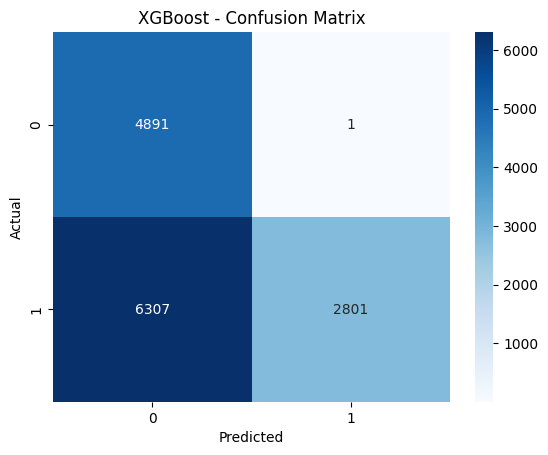

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("📊 XGBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Random Forest Classifier Results
Accuracy: 0.9479285714285715
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4892
           1       0.95      0.97      0.96      9108

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.94     14000
weighted avg       0.95      0.95      0.95     14000



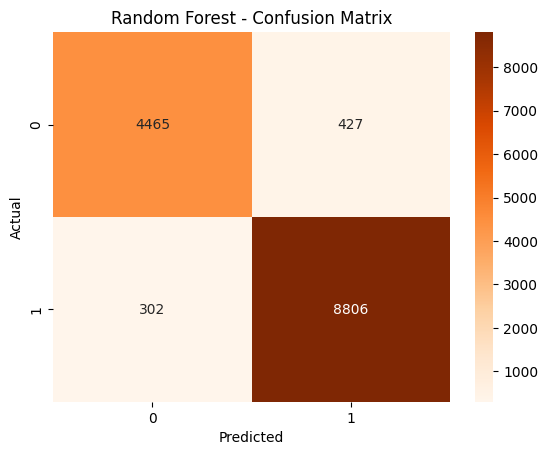

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
